In [1]:
import matplotlib.pyplot as plt 
from scipy.stats import norm
from matplotlib import cm
import pandas as pd
import numpy as np

%matplotlib notebook

#np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
sample_sta = df.T.describe().loc['std'].values
sample_mean = df.T.describe().loc['mean'].values
sample_size = df.T.describe().loc['count'].values
alpha = 0.05
percent = 1 - alpha/2
ratio = norm.ppf(0.975) #Percent point function (inverse of cdf — percentiles) 95% confidence interval
error = (sample_sta / np.sqrt(sample_size))*ratio #calculate the confidence interval
y = 36956

In [2]:
def recolor(y):
    diff = y-sample_mean
    sign = abs(diff)/diff
    old_range = abs(diff).min(), abs(diff).max()
    new_range = 0.5, 1
    shade = sign*np.interp(abs(diff),old_range, new_range)
    reds = cm.Reds #colormap of red
    blues = cm.Blues #colormap of blue
    #use shade red when shade is negative 
    #use shade blue when shade is postive 
    color = ['white' if x == 0 else reds(abs(x))  # scalar ------> RGBA mappings take[0,1]
                     if x < 0  else blues(abs(x))
                     for x in shade]
    return color

In [3]:
def onclick(event):
    if event.xdata<=0.05:
        plt.cla()
        plt.axhline(event.ydata,color='grey',lineWidth=3)
        plt.bar(range(df.shape[0]),sample_mean,width = 1, edgecolor='black',color=recolor(event.ydata), yerr = error,capsize=15)
        plt.text(4,event.ydata-4000,'y={}'.format(int(event.ydata)),backgroundcolor='grey')
        plt.gca().set_xticks(np.arange(0,df.shape[0]*(3/2)))
        plt.gca().set_xticklabels(['1992','1993','1994','1995'])
        plt.tick_params(axis='x', bottom = False) # hide the tick in x-axis not

<IPython.core.display.Javascript object>


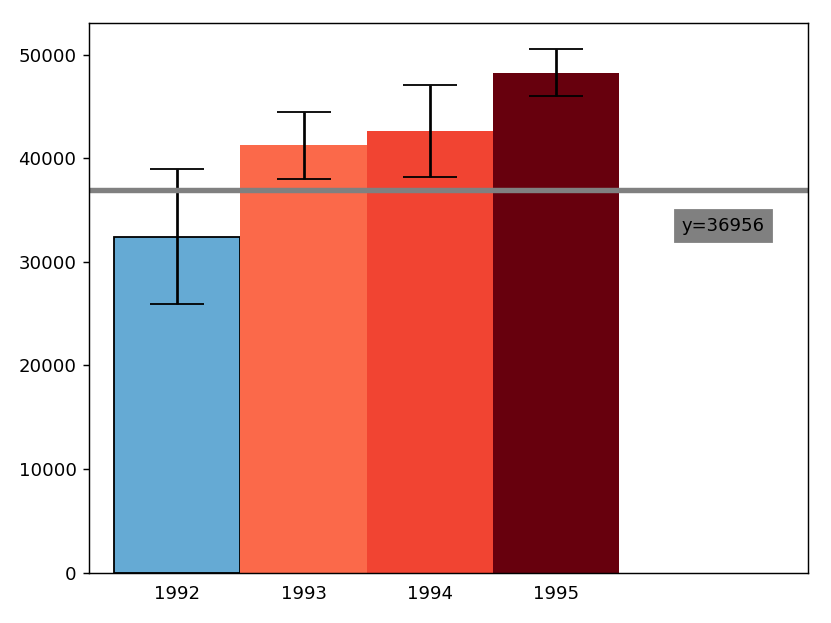

8

In [4]:
plt.figure()
plt.axhline(y,color='grey',lineWidth=3)
plt.bar(range(df.shape[0]),sample_mean,width = 1, edgecolor='black',color=recolor(y), yerr = error,capsize=15)
plt.text(4,y-4000,'y={}'.format(y),backgroundcolor='grey')
plt.gca().set_xticks(np.arange(0,df.shape[0]*(3/2)))
plt.gca().set_xticklabels(['1992','1993','1994','1995'])
plt.tick_params(axis='x', bottom = False) # hide the tick in x-axis not
plt.tight_layout()
plt.gcf().canvas.mpl_connect('button_press_event', onclick)